# Loan Approval Prediction — Complete ML Project



In [1]:
# !pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn joblib


## 1 — Imports

In [2]:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib


## 2 — Load dataset


In [27]:
df = pd.read_csv('Loan-Approval-Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [29]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Now the target column is 'loan_status'
print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


## 3 — Quick EDA

In [30]:
print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Shape: (614, 13)

Missing values:
 loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

Target value counts:
 loan_status
Y    422
N    192
Name: count, dtype: int64


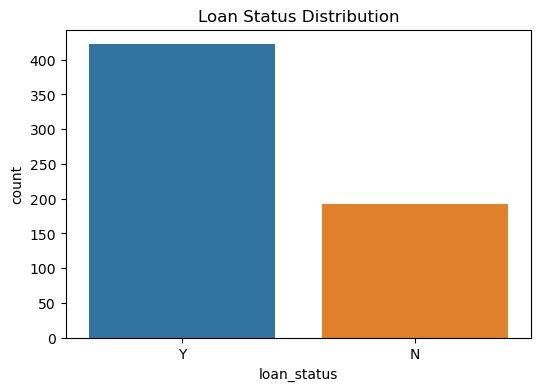

In [31]:

# Clean column names
df.columns = df.columns.str.strip().str.lower()

print('Shape:', df.shape)
print('\nMissing values:\n', df.isnull().sum())
print('\nTarget value counts:\n', df['loan_status'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()


## — Preprocessing setup

Convert target to numeric and select features. Adjust features list if your dataset columns differ.

In [32]:
print("Unique values before mapping:", df['loan_status'].unique())
print("Value counts before mapping:\n", df['loan_status'].value_counts())


Unique values before mapping: ['Y' 'N']
Value counts before mapping:
 loan_status
Y    422
N    192
Name: count, dtype: int64


In [33]:
print(df.columns.tolist())


['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']


In [34]:
print(df['loan_status'].unique())
print(df['loan_status'].isna().sum(), "missing values out of", len(df))

['Y' 'N']
0 missing values out of 614


In [35]:

import pandas as pd

df = pd.read_csv("Loan-Approval-Prediction.csv", encoding="utf-8", sep=",")
print(df.head())
print(df.shape)


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

 ## Encode Categorical Features

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Now correlation will work
corr_matrix = df.corr()


## Feature Correlation Heatmap

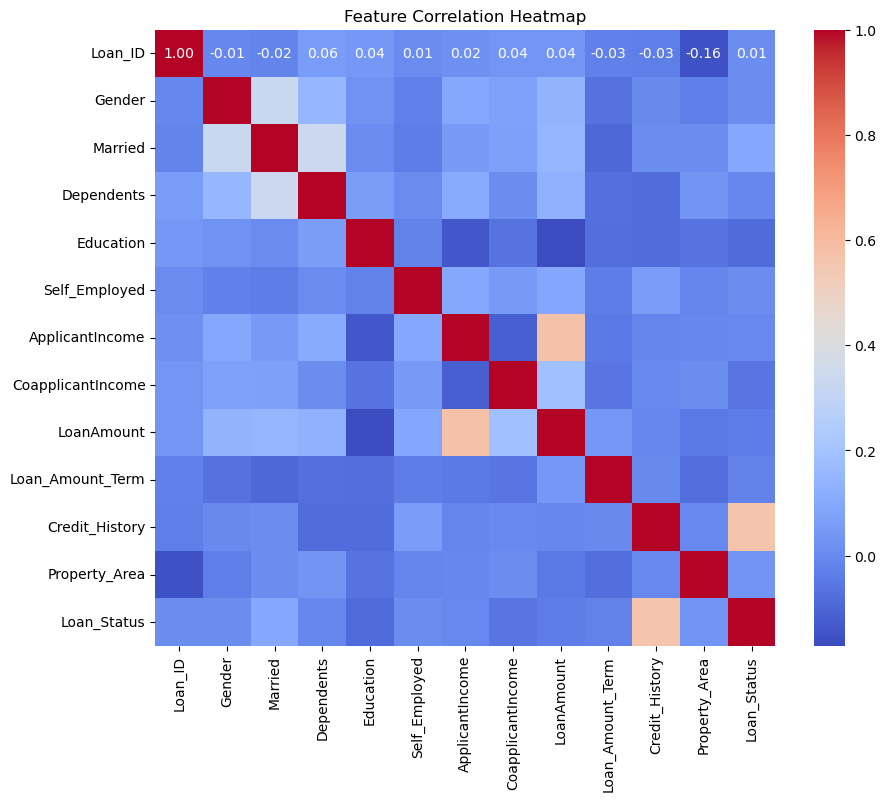

In [37]:
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## Define Features (X) and Target (y)

In [38]:
X = df.drop('Loan_Status', axis=1)  # Input features
y = df['Loan_Status']              # Target variable

In [40]:
X = SimpleImputer(strategy='mean').fit_transform(X)

In [41]:
# To deal with class imbalance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

## Class Distribution Before SMOTE

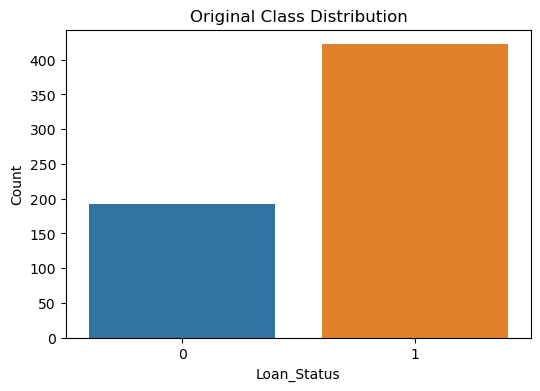

In [50]:
# 📊 Visualize class distribution before SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Original Class Distribution')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

## Class Distribution After SMOTE

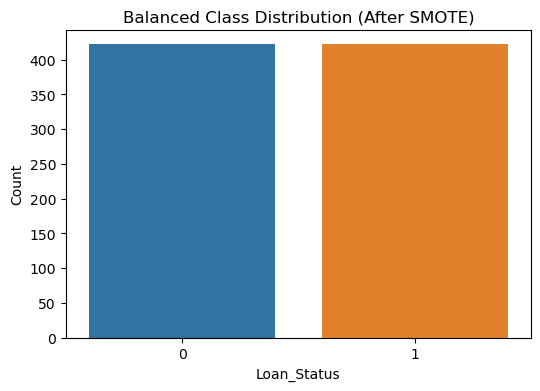

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title('Balanced Class Distribution (After SMOTE)')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()


## Split the Dataset into Train and Test Sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (491, 12) Test shape: (123, 12)


## Evaluate Logistic Regression

In [52]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
     

## Evaluate Decision Tree

In [53]:
print("📊 Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

📊 Decision Tree Results:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68        38
           1       0.85      0.88      0.87        85

    accuracy                           0.81       123
   macro avg       0.78      0.77      0.78       123
weighted avg       0.81      0.81      0.81       123

Confusion Matrix:
[[25 13]
 [10 75]]


## Confusion Matrix Heatmaps for Both Models

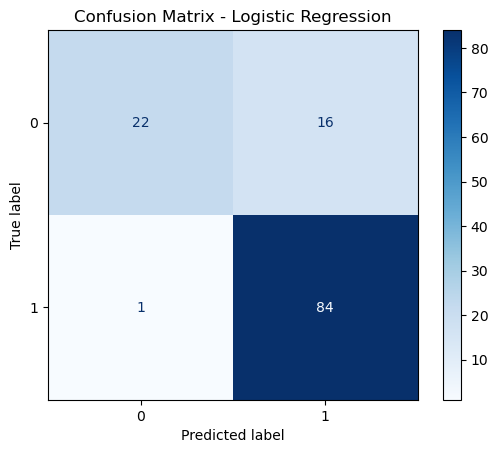

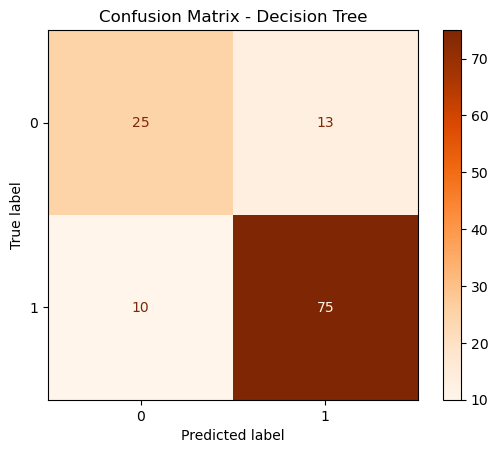

In [54]:
# 📊 Confusion Matrix - Logistic Regression (Heatmap)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# 📊 Confusion Matrix - Decision Tree (Heatmap)
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap='Oranges')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
